<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/Ex2__Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/MachineLearning/ex2-logistic regression

/content/drive/My Drive/MachineLearning/ex2-logistic regression


# logistic_regression（逻辑回归）

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# import tensorflow as tf
from sklearn.metrics import classification_report  # 这个包可以生成评价报告

## 准备数据

In [6]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()  # 看前五行

exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

In [7]:
data.describe()

exam1       exam2    admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


TypeError: unhashable type: '_ColorPalette'  
解决方法： color_codes=False

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


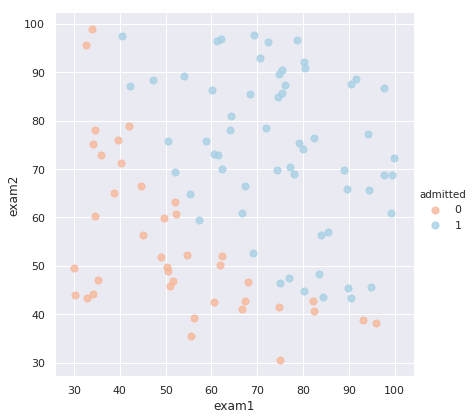

In [8]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2), color_codes=False)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()

In [0]:
def get_X(df):  # 读取特征
    """
    use concat to add intersect feature to avoid side effect
    not efficient for big dataset though
    """
    ones = pd.DataFrame({'ones': np.ones(len(df))})  # ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)             # 合并数据，根据列合并
    return data.iloc[:, :-1].as_matrix()             # 这个操作返回 ndarray,不是矩阵


def get_y(df):  # 读取标签
    '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])                  # df.iloc[:, -1]是指df的最后一列


def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())  

In [11]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## sigmoid 函数
<font face=楷体>
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$
逻辑回归模型假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$
</font>

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

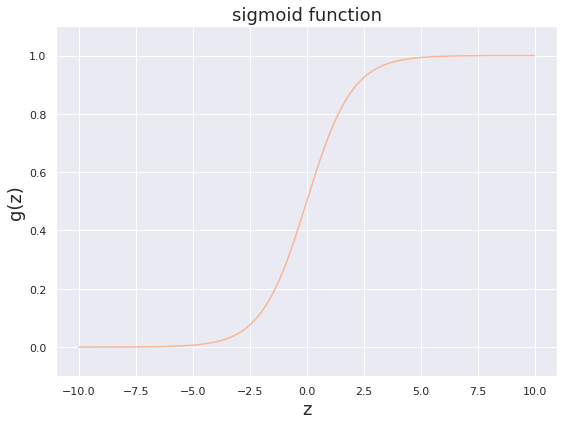

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

## cost function(代价函数)

<font face=楷体>
$\max(\ell(\theta)) = \min(-\ell(\theta))$  ，选择 $-\ell(\theta)$ 作为 $\color{pink}{cost\ function}$，所以优化目标变成最小化$J(\theta)$
</font>

$$\begin{align}
  J\left( \theta  \right) &=-\frac{1}{m}\sum\limits_{i=1}^{m}{\left[{{y}^{(i)}}\log ( {{h}_{\theta }}( {{x}^{(i)}}))+( 1-{{y}^{(i)}} )\log ( 1-{{h}_{\theta }}( {{x}^{(i)}} ))\right]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{\left[-{{y}^{(i)}}\log ( {{h}_{\theta }}( {{x}^{(i)}} ) )-( 1-{{y}^{(i)}} )\log ( 1-{{h}_{\theta }}( {{x}^{(i)}}))\right]} \\ 
\end{align}$$


In [16]:
theta = np.zeros(3)  # X(m*n) so theta is n*1
print("theta:",theta)

def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))  # X @ theta与X.dot(theta)等价

print("cost:",cost(theta, X, y))

theta: [0. 0. 0.]
cost: 0.6931471805599453


## gradient descent(梯度下降)  

<font face=楷体>
    
向量化批量梯度下降（$\text{batch gradient descent}$）： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$  
</font>  

    
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [0]:
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [18]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## 拟合参数  
<font face=楷体 color=green size=4>绿色链接：</font>  

【1】[`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)   
【2】[最优化学习笔记](https://www.cnblogs.com/NaughtyBaby/p/5590081.html)


In [20]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)  # 寻找参数
print(res)

     fun: 0.203497708881501
     jac: array([-8.26207510e-06, -3.70033535e-04, -3.97954680e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 29
    njev: 254
  status: 0
 success: True
       x: array([-25.16833701,   0.20628773,   0.20152827])


## 用训练集预测和验证

In [0]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [22]:
final_theta = res.x  
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 寻找决策边界

 $X \times \theta = 0$  

<font face=楷体 color=green size=4>**绿色链接:**</font>  
【1】[Why is logistic regression a linear classifier](http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier)

In [23]:
print(res.x)  # this is final theta

[-25.16833701   0.20628773   0.20152827]


In [24]:
coef = -(res.x / res.x[2])  
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x   # 最优分界线

[124.88737673  -1.02361684  -1.        ]


In [25]:
data.describe()  # find the range of x and y

exam1       exam2    admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000

<font face=楷体 color=skyblue size=4>$x$和$y$的截距都在125左右</font>

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


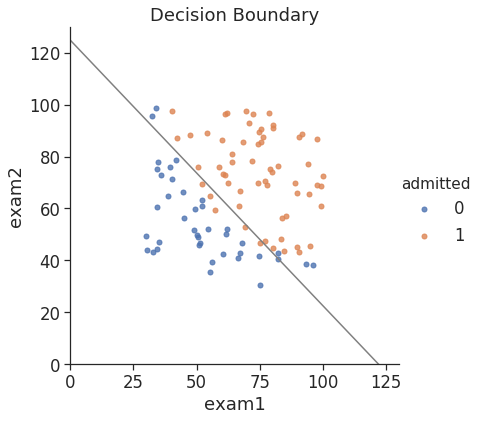

In [26]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 正则化逻辑回归

In [27]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

test1    test2  accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


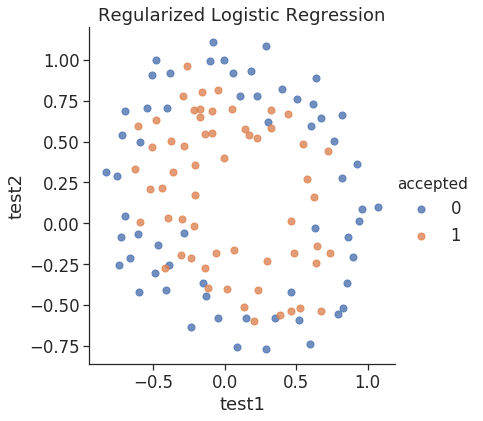

In [28]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

## feature mapping（特征映射）

<font face=楷体 color=skyblue size=4>多项式展开</font>

$$mapFeature(x)=
\left[\begin{array}{c}{1\\x_1\\x_2\\x_1^2\\x_1x_2\\x^2_2\\x_1^3\\\ \ \vdots\\x_1x_2^5\\x_2^6}\end{array}\right]
$$
<font face=楷体 color=yellow size=4>**疑问：**</font>  
二项式???????????????????????????????????????????????????????????????????  

<font face=楷体 color=green size=4>**绿色链接：**</font>  
【1】[Python format 格式化函数](https://www.runoob.com/python/att-string-format.html)

In [0]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [30]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


f00       f10      f01       f20  ...       f33       f24       f15       f06
0  1.0  0.051267  0.69956  0.002628  ...  0.000046  0.000629  0.008589  0.117206
1  1.0 -0.092742  0.68494  0.008601  ... -0.000256  0.001893 -0.013981  0.103256
2  1.0 -0.213710  0.69225  0.045672  ... -0.003238  0.010488 -0.033973  0.110047
3  1.0 -0.375000  0.50219  0.140625  ... -0.006679  0.008944 -0.011978  0.016040
4  1.0 -0.513250  0.46564  0.263426  ... -0.013650  0.012384 -0.011235  0.010193

[5 rows x 28 columns]

In [31]:
data.describe()

f00         f10         f01  ...           f24         f15           f06
count  118.0  118.000000  118.000000  ...  1.180000e+02  118.000000  1.180000e+02
mean     1.0    0.054779    0.183102  ...  2.259170e-02   -0.006302  1.257256e-01
std      0.0    0.496654    0.519743  ...  4.346935e-02    0.090621  2.964416e-01
min      1.0   -0.830070   -0.769740  ...  2.418097e-10   -0.482684  1.795116e-14
25%      1.0   -0.372120   -0.254385  ...  3.528590e-04   -0.016662  2.298277e-04
50%      1.0   -0.006336    0.213455  ...  3.921378e-03   -0.000020  1.604015e-02
75%      1.0    0.478970    0.646562  ...  2.103622e-02    0.001289  1.001215e-01
max      1.0    1.070900    1.108900  ...  2.556084e-01    0.436209  1.859321e+00

[8 rows x 28 columns]

## regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [32]:
theta = np.zeros(data.shape[1])
print(theta.shape)
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(28,)
(118, 28)
(118,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [33]:
# 正则化代价函数
def regularized_cost(theta, X, y, l=1):
    '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term

regularized_cost(theta, X, y, l=1)

0.6931471805599454

<font face=楷体 color=skyblue>因为设置theta为0，所以正则化代价函数与代价函数的值相同

## regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }，\ \quad for  \ j\ge \text{1}$$

In [34]:
def regularized_gradient(theta, X, y, l=1):
    '''
    still, leave theta_0 alone
    '''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## 拟合参数

In [35]:
import scipy.optimize as opt

print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127532
     jac: array([ 2.49665979e-08,  6.75202012e-11,  1.08466174e-07,  3.35532344e-08,
        1.89306448e-08, -8.27493330e-09,  1.66090341e-08,  2.61579069e-08,
        1.30397526e-08,  1.77535925e-08, -1.67712492e-08, -4.54007164e-10,
       -2.85071983e-08,  5.92452807e-09, -3.30678421e-08,  8.84446122e-09,
        1.64202223e-08, -8.36491532e-09, -1.84171537e-09,  1.07600649e-08,
       -1.89008161e-08, -7.18406743e-09,  1.59962038e-09, -1.25117485e-08,
       -5.03956881e-09, -1.21487383e-08,  2.04940517e-09, -4.00864843e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 68
  status: 0
 success: True
       x: array([ 1.27273858,  0.62527136,  1.18108796, -2.01996006, -0.91742423,
       -1.43166336,  0.12400688, -0.3655345 , -0.35723914, -0.1751299 ,
       -1.45815771, -0.05098963, -0.61555643, -0.27470696, -1.19281589,
       -0.24218798, -0.2060058 , -0.04473123, -0.27778487, -0.29537783,
       -0.4

## 预测

In [36]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



## 使用不同的 $\lambda$ （这个是常数）
<font face=楷体 color=skyblue size=4>画出决策边界</font>
<font face=楷体>
* 找到所有满足 $X\times \theta = 0$ 的$X$
* 不用解多项式方程，只需要创建一个密度足够大的网格，然后找出所有的$X\times\theta\approx 0$，然后画出来
</font>

In [0]:
def draw_boundary(power, l):
    """
    power: polynomial power for mapped feature
    l: lambda constant
    """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [0]:
def feature_mapped_logistic_regression(power, l):
    """for drawing purpose only.. not a well generealize logistic regression
    power: int
        raise x1, x2 to polynomial power
    l: int
        lambda constant for regularization term
    """
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

<font face=楷体 color=yellow size=4>**疑问：**</font>  
decision = mapped_cord[np.abs(inner_product) < threshhold]  
<font face=楷体 color=green size=4>绿色链接：</font>  
【1】[Python zip()](https://www.programiz.com/python-programming/methods/built-in/zip)

In [0]:
#寻找决策边界函数
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)  # * 表示解压返回tuple
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


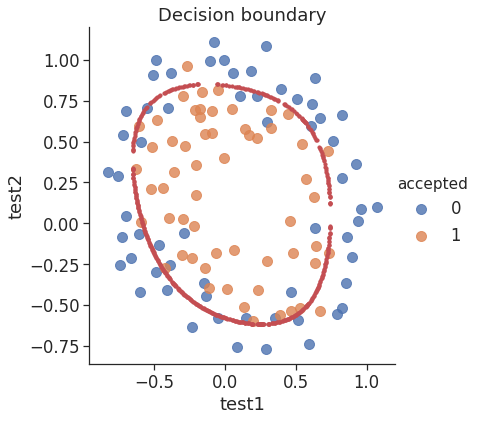

In [40]:
draw_boundary(power=6, l=1)  # lambda=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


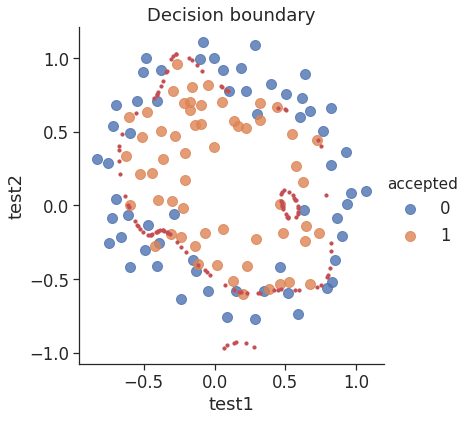

In [41]:
draw_boundary(power=6, l=0)  # lambda=0,没有正则化，过拟合了

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


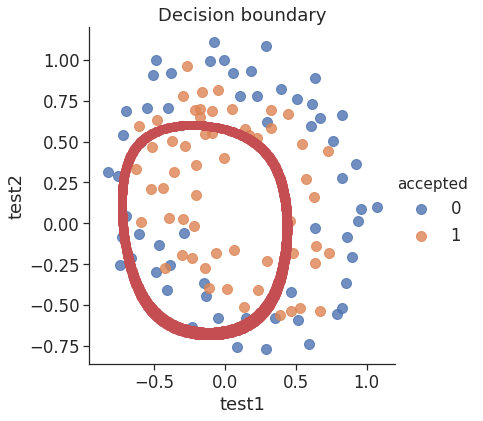

In [42]:
draw_boundary(power=6, l=100)  # lambda=100,欠拟合